In [1]:
from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

In [4]:
import numpy as np
def my_generator(x, y, batch_size):
    while True:
        for i in range(0, len(y), batch_size):
            img = x[i:i + batch_size]
            lb = y[i:i + batch_size]
            aug_img, aug_lb = next(datagen.flow(img, lb, batch_size=batch_size))
            images = np.concatenate((img, aug_img), axis=0)
            labels = np.concatenate((lb, aug_lb), axis=0)
            yield images, labels

In [5]:
# 建立 ResNet 模型
model = resnet(input_shape=(32,32,3)) 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
_____________________________________

In [6]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 20 # 訓練整個資料集共 30個循環

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

train_datagen = my_generator(x_train, y_train, batch_size)

history = model.fit_generator(train_datagen,
                    steps_per_epoch=int(len(x_train)/batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
781/781 [==============================] - 236s 302ms/step - loss: 1.8631 - acc: 0.4949 - val_loss: 1.6590 - val_acc: 0.5438
Epoch 2/20
781/781 [==============================] - 232s 298ms/step - loss: 1.3878 - acc: 0.6301 - val_loss: 1.4020 - val_acc: 0.6269
Epoch 3/20
781/781 [==============================] - 231s 296ms/step - loss: 1.1725 - acc: 0.6961 - val_loss: 1.2018 - val_acc: 0.6882
Epoch 4/20
781/781 [==============================] - 238s 305ms/step - loss: 1.0384 - acc: 0.7378 - val_loss: 1.0942 - val_acc: 0.7227
Epoch 5/20
781/781 [==============================] - 236s 303ms/step - loss: 0.9519 - acc: 0.7653 - val_loss: 1.1638 - val_acc: 0.7179
Epoch 6/20
781/781 [==============================] - 233s 299ms/step - loss: 0.8899 - acc: 0.7836 - val_loss: 1.1836 - val_acc: 0.7200
Epoch 7/20
781/781 [==============================] - 229s 294ms/step - loss: 0.8400 - acc: 0.8019 - val_loss: 1.3593 - val_acc: 0.6948


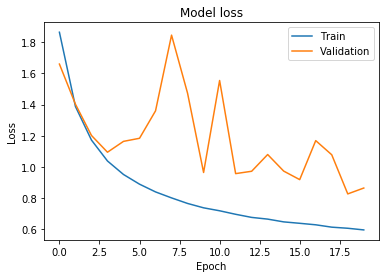

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', "Validation"])

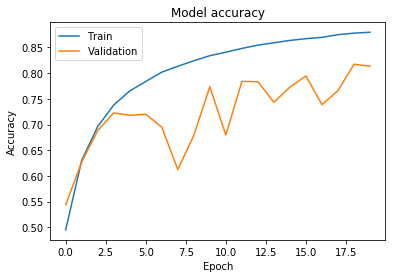

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠訓練!

最後一天的作業請閱讀這篇[非常詳盡的文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet

## 進階挑戰!
有志以成為機器學習工程師為目標的同學們可以參加這個挑戰，這[網站](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)記錄了歷年來 Cifar-10 中排名最高的論文，請試著閱讀論文並撰寫出相對應的程式碼，復現出論文的結果。

這樣的能力在機器學習領域中是非常重要的，具備閱讀他人論文並實現的能力，可為自己在履歷上增添不少分數，當然難度也相當高，若是不透徹了解文章內容或是程式能力不夠紮實，可是不能復現別人辛苦的研究成果的喔! 就請各位同學好好努力，往自己的機器學習之路邁進吧:)